# E-Commerce Recommendation System

## Importing Libraries 

In [4]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics.pairwise import cosine_similarity 

from sklearn.metrics import mean_squared_error

## Importing Dataset

In [12]:
df=pd.read_csv('ratings_Electronics.csv') #data with no headers

In [14]:
df.columns=["user_id","prod_id","rating","timestamp"] #Adding column names to the dataset 

In [15]:
df.head(3)

,user_id,prod_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200


In [17]:
df=df.drop('timestamp',axis=1)#dropping the timestamp

In [18]:
df.head(3)

,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0


In [19]:
df_copy=df.copy(deep=True) #coping the dataframe to other dataframe 

In [20]:
df_copy.head(3)

,user_id,prod_id,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0


# EDA - Exploratory Data Analysis 
#### check for-
#### 1.Shape
#### 2.Datatype
#### 3.Missing values
#### finally get the summary and check 
#### 1.rating distribution 
#### 2.number of users and products
#### 3.Users with highest no of ratings 


# 1. Shape

In [23]:
rows,columns=df.shape
print("No of Rows :",rows)
print("No of Columns:",columns)

No of Rows : 7824481
No of Columns: 3


# 2.DataType

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   prod_id  object 
 2   rating   float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


# 3.Missing values

In [25]:
df.isna().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

# 4.Summary

In [27]:
#summary statistics for raiting 
df["rating"].describe()

count    7.824481e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

# Rating Distribution 

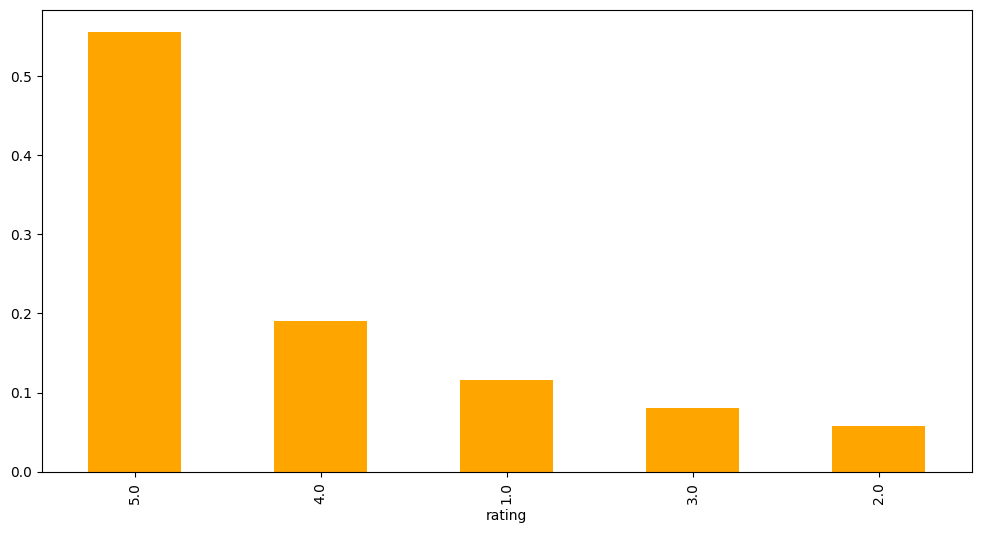

In [32]:
#create the plot and provide observation 

plt.figure(figsize=(12,6))
df['rating'].value_counts(1).plot(kind='bar',color="orange")
plt.show()

# No of Unique users and items 

In [33]:
#Number of Unique user id and product id in the data 
print("Number of unique USERS in raw data=",df['user_id'].nunique())
print("Number of unique ITEMS in raw data=",df['prod_id'].nunique())

Number of unique USERS in raw data= 4201696
Number of unique ITEMS in raw data= 476001


In [34]:
# Users with most no:of rating 
most_rated = df.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated

user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
dtype: int64

# Pre-Processing

In [35]:
counts=df["user_id"].value_counts()
df_final=df[df["user_id"].isin(counts[counts >= 50].index)]

In [36]:
print("the No:of observations in the final data=",len(df_final))
print("Number of unique USERS in the final data =",df_final['user_id'].nunique())
print("Number of unique PRODUCTS in the final data =",df_final['prod_id'].nunique())

the No:of observations in the final data= 125871
Number of unique USERS in the final data = 1540
Number of unique PRODUCTS in the final data = 48190


# Checking the density of the rating matrix 

In [39]:
#creating the interaction matrix of products and users based on ratings and replacing NaN vlue with zero
final_rating_matrix = df_final.pivot(index='user_id',columns='prod_id',values='rating').fillna(0)
print("Shaped of the final_rating_matrix:",final_rating_matrix.shape)

Shaped of the final_rating_matrix: (1540, 48190)


In [40]:
#Find the number of non-zero entries in the interaction matrix 
given_num_of_ratings = np.count_nonzero(final_rating_matrix)
print("Given no:of ratings=",given_num_of_ratings)

Given no:of ratings= 125871


In [43]:
#Finding the possible no:of ratings as per the number of users and products 
possible_num_of_ratings=final_rating_matrix.shape[0]*final_rating_matrix.shape[1]
print("Possible number of ratings are:",possible_num_of_ratings)

Possible number of ratings are: 74212600


In [50]:
# density of the rating 
density=(given_num_of_ratings/possible_num_of_ratings)
density *= 100
print('density :',round(density,2))

density : 0.17


In [51]:
#Everything:
print("Shaped of the final_rating_matrix:",final_rating_matrix.shape)
print("Given no:of ratings=",given_num_of_ratings)
print("Possible number of ratings are:",possible_num_of_ratings)
print('density :',round(density,2))

Shaped of the final_rating_matrix: (1540, 48190)
Given no:of ratings= 125871
Possible number of ratings are: 74212600
density : 0.17


In [52]:
final_rating_matrix.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Rank Based Recommendation System

In [70]:
# Convert 'rating' column to numeric (if necessary)
df_final['rating'] = pd.to_numeric(df_final['rating'], errors='coerce')

# Remove rows with missing values in 'rating' column
df_final = df_final.dropna(subset=['rating'])

# Calculate average rating per 'prod_id'
average_rating = df_final.groupby('prod_id')['rating'].mean()
average_rating


prod_id
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
                ...   
B00LED02VY    4.000000
B00LGN7Y3G    5.000000
B00LGQ6HL8    5.000000
B00LI4ZZO8    4.500000
B00LKG1MC8    5.000000
Name: rating, Length: 48190, dtype: float64

In [68]:
#Calculate the count of ratings for each product
count_rating = df_final.groupby('prod_id').count()['rating']


In [69]:
count_rating

prod_id
0594451647    1
0594481813    1
0970407998    2
0972683275    4
1400501466    6
             ..
B00LED02VY    1
B00LGN7Y3G    1
B00LGQ6HL8    5
B00LI4ZZO8    2
B00LKG1MC8    1
Name: rating, Length: 48190, dtype: int64

In [71]:
#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()

,avg_rating,rating_count
prod_id,,
0594451647,5.0,1
B003RRY9RS,5.0,1
B003RR95Q8,5.0,1
B003RIPMZU,5.0,1
B003RFRNYQ,5.0,2


In [72]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):
    
    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]
    
    #Sorting values w.r.t average rating 
    recommendations = recommendations.sort_values('avg_rating',ascending=False)
    
    return recommendations.index[:n]
     


# Recommending top 5 products with 50 minimum interactions based popularity 

In [73]:
list(top_n_products(final_rating, 5, 50))


['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']

# Recommending top 5 products with 100 minimum interactions based on popularity 

In [74]:
list(top_n_products(final_rating, 5, 100))


['B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC']